In [55]:
import numpy as np
import pandas as pd

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#import plotly
import fbprophet
from fbprophet import Prophet

In [56]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '1d86fb2e-0dc9-4639-b35b-fc2dfac4e193'
resource_group = 'Recurso1'
workspace_name = 'ML_fco'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='IPSA')
stock_ipsa = dataset.to_pandas_dataframe()

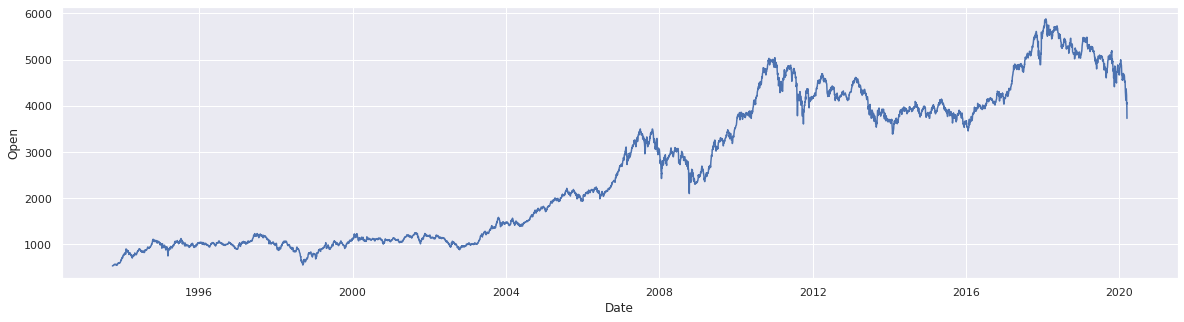

In [30]:
plt.figure(figsize=(20,5))
#plt.axvline(x=1000)
sns.lineplot(x="Date", y="Open",   estimator = 'median' , data=stock_ipsa)
#sns.lineplot(x=1)

In [32]:
#df['ds'] = sqmdata['Date']
stock_ipsa.rename(columns={'Date':'ds',
                          'Open':'y'
                         }, 
                 inplace=True)

In [37]:
my_model = Prophet()
my_model.fit(stock_ipsa)

future = my_model.make_future_dataframe(periods=24, freq='m')

forecast = my_model.predict(future)

INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


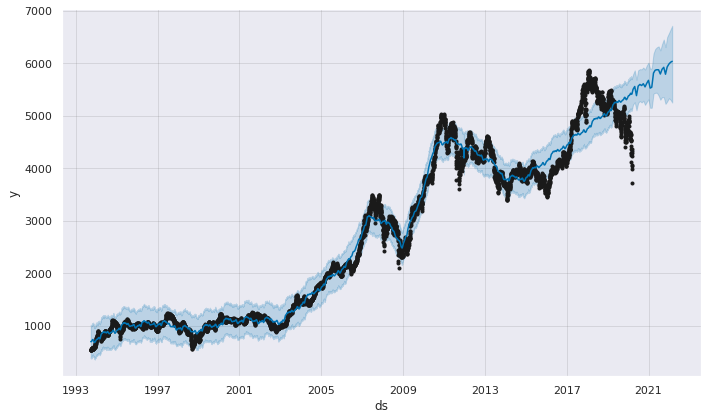

In [38]:
fig = my_model.plot(forecast)

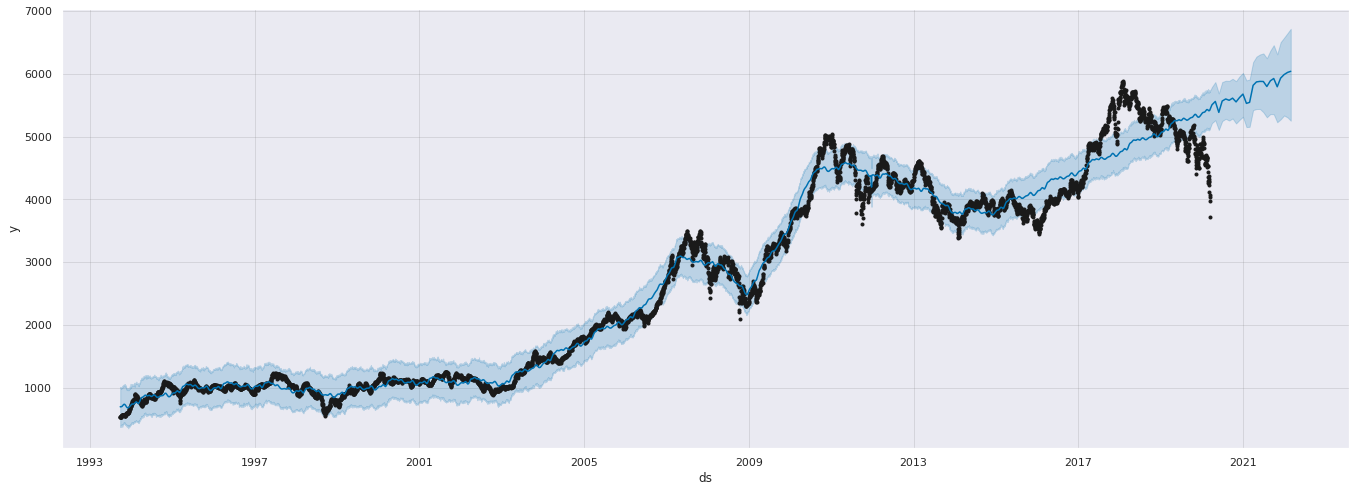

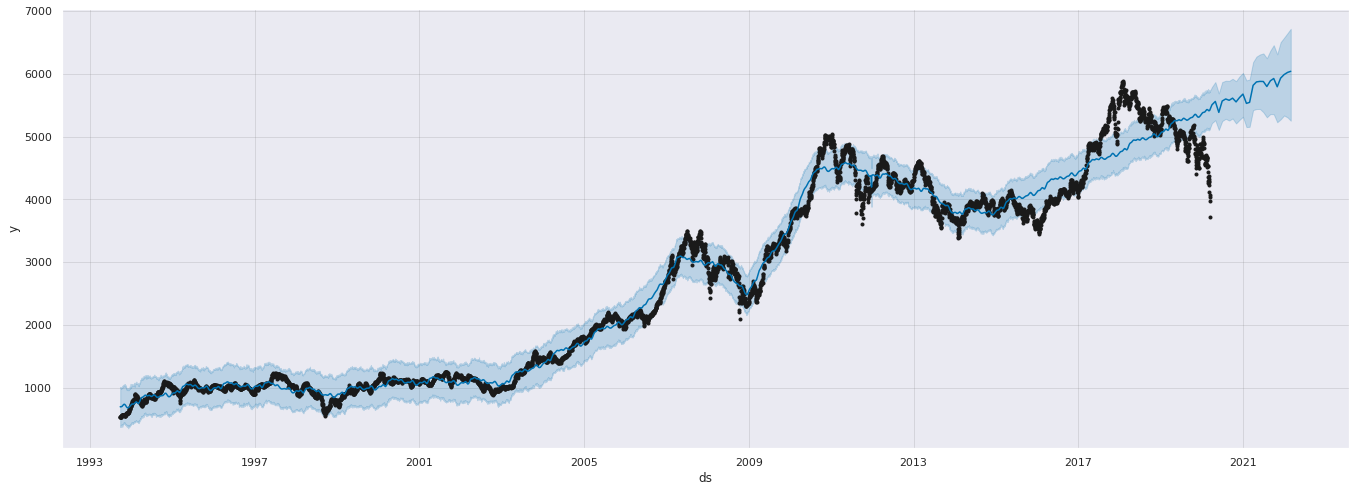

In [49]:
from fbprophet.plot import plot
plot(my_model, forecast, figsize=(19, 7))

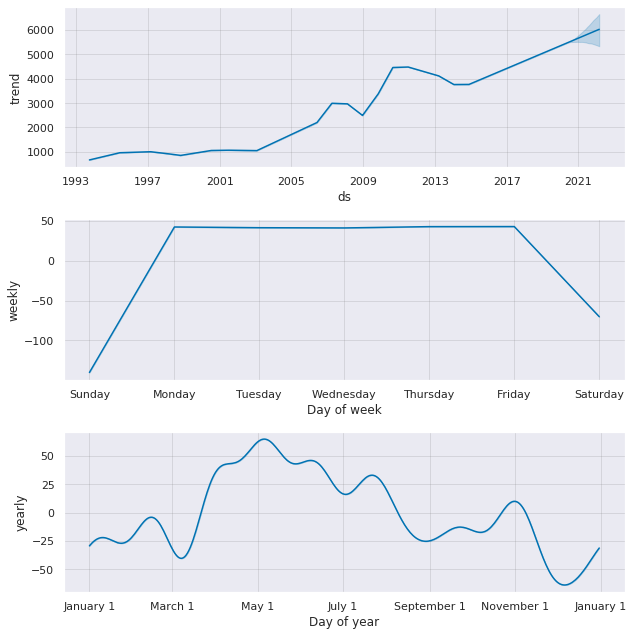

In [54]:
fig = my_model.plot_components(forecast)

In [57]:
stock_ipsa.dtypes

Date              datetime64[ns]
Clase                    float64
Open                     float64
High                     float64
Low                      float64
Var_Porcentual           float64
dtype: object